Theoretical optimum omega =  1.9160254700364179
Potential is zero on all other boundaries
Desired fractional change =  0.0001
After 0 iterations, fractional change = 0.662921
After 10 iterations, fractional change = 0.245687
After 20 iterations, fractional change = 0.092559
After 30 iterations, fractional change = 0.083506
After 40 iterations, fractional change = 0.062717
After 50 iterations, fractional change = 0.013674
After 60 iterations, fractional change = 0.007613
After 70 iterations, fractional change = 0.004236
After 80 iterations, fractional change = 0.003591
After 90 iterations, fractional change = 0.002704
After 100 iterations, fractional change = 0.002279
After 110 iterations, fractional change = 0.003349
After 120 iterations, fractional change = 0.001455
After 130 iterations, fractional change = 0.001104
After 140 iterations, fractional change = 0.000877
After 150 iterations, fractional change = 0.000765
After 160 iterations, fractional change = 0.000866
After 170 iteratio

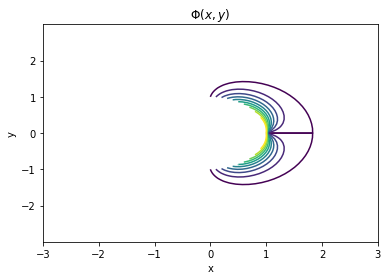

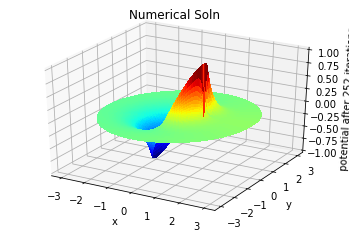

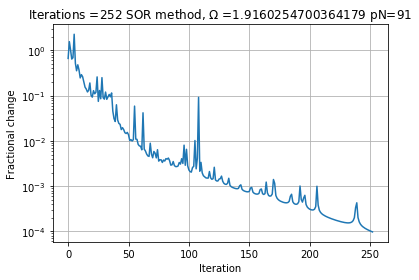

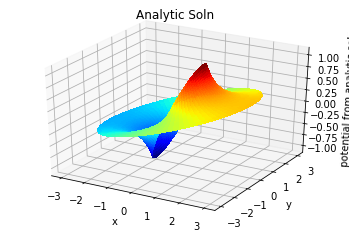

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


#* Initialize parameters (system size, grid spacing, etc.)
method = 3
rN = 61
pN = 91
animate=0
n = 1
rL = 2          # System size (length)
pL = 2*np.pi
rh = rL/(rN-1)    # Grid spacing
ph = pL/(pN-1)
r = np.arange(0,rN)*rh+1  # r coordinate
phi = np.arange(0,pN)*ph # phi coordinate
x = np.array([i*np.cos(j) for i in r for j in phi])
y = np.array([i*np.sin(j) for i in r for j in phi])
R,P = np.meshgrid(r,phi) # for plotting, note the reversal in x and y
X, Y = R*np.cos(P), R*np.sin(P)

plot_interval = 50 # interval to plot animation, setting it smaller slows the program down alot

#* Select over-relaxation factor (SOR only)
if( method == 3 ):
    rad = .5*(np.cos(np.pi/rN) + np.cos(np.pi/pN))
    omegaOpt = 2/(1+np.sqrt(1-rad**2))  # Theoretical optimum
    print('Theoretical optimum omega = ',omegaOpt)
    omega = omegaOpt#float(input('Enter desired omega: '))

#* Set initial guess as first term in separation of variables soln.
A0 = 1     # Potential at r=1
# phi = phi0 * 4/(np.pi*np.sinh(np.pi)) * np.outer(np.sin(np.pi*x/L),np.sinh(np.pi*y/L))
A=np.zeros((rN,pN)) # try this to see it evolve better

#* Set boundary conditions
# first index is the radius and second index is phi (rows,cols)
for i in range(pN): # Apply inner boundary conditions 
    A[0,i] = np.cos(n*phi[i])
A[-1,:] = A[-2,:] # Apply outer boundary condition
A[:,0] = A[:,-1] # Periodic Boundary conditions about phi = 0


print('Potential is zero on all other boundaries')

#plt.ion()

#* Loop until desired fractional change per iteration is obtained
# start_time=cputime     # Reset the cputime counter
newphi = np.copy(phi)           # Copy of the solution (used only by Jacobi)
iterMax = pN**2          # Set max to avoid excessively long runs
changeDesired = 1.0e-4   # Stop when the change is given fraction
print('Desired fractional change = ',changeDesired)
change = np.array([])

for iter in range(0,iterMax):
    changeSum = 0.0
  
    ## SOR method ##
    for i in range(1,rN-1):        # Loop over interior points only
        for j in range(1,pN-1):
            newA = 0.25*omega*(A[i+1,j]+A[i-1,j]+ A[i,j-1]+A[i,j+1])  +  (1-omega)*A[i,j]
            changeSum = changeSum + abs(1-A[i,j]/newA)
            A[i,j] = newA
    
    
    # Update boundary conditions
    for i in range(pN): # Apply inner boundary conditions 
        A[0,i] = np.cos(n*phi[i])
    A[-1,:] = A[-2,:] # Apply outer boundary condition
    A[:,0] = A[:,-1] # Periodic Boundary conditions about phi = 0
    
    #* Check if fractional change is small enough to halt the iteration
    change = np.append(change,changeSum/(pN-2)**2)
    if( iter%10 < 1 ):
        print('After %d iterations, fractional change = %f'%( iter,change[-1]))

    if( change[-1] < changeDesired ):
      print('Desired accuracy achieved after %d iterations'%iter)
      print('Breaking out of main loop')
      break
# animate
    if(animate ==1 and iter%plot_interval<1):
        fig = plt.figure(2)   # Clear figure 2 window and bring forward
        plt.clf()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(X, Y, A.T, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('potential after '+str(iter)+' iterations')
        plt.draw()
        plt.show()
        plt.pause(0.1)

# total_time = cputime - start_time # get the total cpu time

#* Plot final estimate of potential as contour and surface plots

#plt.ioff()

plt.figure(1);plt.clf()
contourLevels = np.arange(0,1,0.1) #
plt.contour(X,Y,A.T,contourLevels)  # Contour plot
# clabel(cs,contourLabels)  # Add labels to selected contour levels
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$\Phi(x,y)$')

fig = plt.figure(2)   # Clear figure 2 window and bring forward
plt.clf()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, A.T, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('potential after '+str(iter)+' iterations')
ax.set_title("Numerical Soln")

#* Plot the fractional change versus iteration
plt.figure(3); 
plt.clf()
plt.semilogy(change)
plt.xlabel('Iteration')
plt.ylabel('Fractional change')
if method==1:
    title=' Jacobi method'
elif(method==2):
    title =' Gauss-Seidel method'
elif(method==3):
    title=' SOR method, $\Omega$ ='+str(omega)

plt.title(r'Iterations ='+str(iter)+title+' pN='+str(pN))
plt.grid(True)

fig = plt.figure(4)   # Clear figure 2 window and bring forward
plt.clf()
ax = fig.gca(projection='3d')
A_analytic = np.zeros((rN,pN))
for i in range(rN):
    for j in range(pN):
        A_analytic[i,j] = ( ( (3**(2*n)/r[i]**2) + r[i]**n)/(3**(2*n)   ) )*np.cos(n*phi[j])
surf = ax.plot_surface(X, Y, A_analytic.T, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('potential from analytic soln')
ax.set_title("Analytic Soln")
plt.show()